# Домашнее задание по теме: пакет `pandas` (анализ временных рядов)

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

!pip -V

pip 20.3.3 from /home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/pip (python 3.8)


In [2]:
# !conda install numpy pandas matplotlib -y

In [3]:
import pandas as pd

pd.__version__

'1.2.3'

## Загрузка данных

[Источник (Tesla stock data from 2010 to 2020)](https://www.kaggle.com/rpaguirre/tesla-stock-price)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [4]:
# загрузить датасет в pandas dataframe
# ВНИМАНИЕ: при загрузке указать колонку Date как индекс
# ВНИМАНИЕ: загрузить даты как даты (а не как object)
df = pd.read_csv("./../../data/Tesla.csv", 
                 index_col='Date', 
                 parse_dates=True)

# вывести первые 5 и последние 5 строк
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


In [5]:
# тип индекса
# ВНИМАНИЕ: проверить, что тип DatetimeIndex
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
# основные значения описательной статистики
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [7]:
# максимальная цена акции при открытии в марте 2016
df.loc['2016-Mar', 'Open'].max()

237.210007

In [8]:
# медианная цена акции при закрытии в феврале 2017
df.loc['2017-Feb', 'Close'].median()

262.079987

In [9]:
# средняя цена акции при закрытии 
# в период между декабрем 2014 и январем 2015
df.loc['2014-Dec':'2015-Jan', 'Close'].mean()

211.32523783333332

<AxesSubplot:xlabel='Date'>

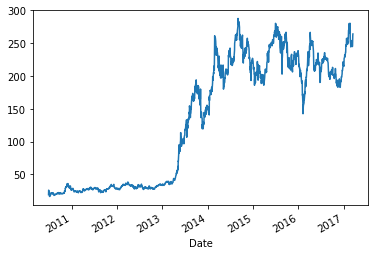

In [10]:
# линейный графиик для цен акции при открытии
df.Open.plot()

<AxesSubplot:xlabel='Date'>

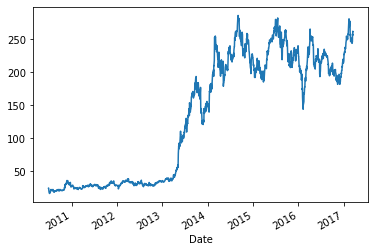

In [11]:
# линейный график для цен акции при закрытии
df.Close.plot()

<AxesSubplot:>

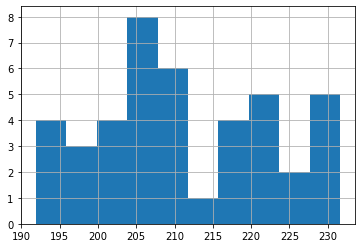

In [12]:
# гистограмма для цены акции при закрытии 
# в период между декабрем 2014 и январем 2015
df.loc['2014-Dec':'2015-Jan', 'Close'].hist()

<AxesSubplot:ylabel='Density'>

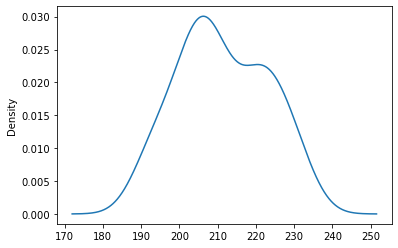

In [13]:
# ядерная оценка плотности для цены акции при закрытии 
# в период между декабрем 2014 и январем 2015
df.loc['2014-Dec':'2015-Jan', 'Close'].plot.kde()

<AxesSubplot:xlabel='Date'>

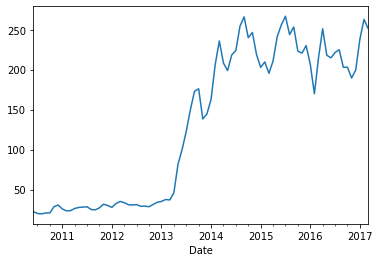

In [14]:
# средняя цена акции (mean) на открытии (Close) по месяцам
close_month_mean = df.resample('M')['Open'].mean()

# линейный график
close_month_mean.plot()

<AxesSubplot:xlabel='Date'>

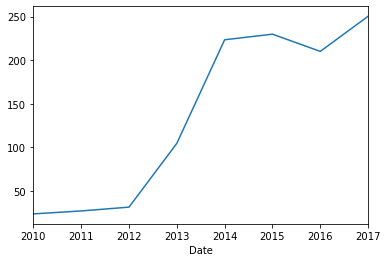

In [15]:
# средняя цена акции (mean) на открытии (Close) по годам
close_year_mean = df.resample('Y')['Open'].mean()

# линейный график
close_year_mean.plot()